In [44]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gudhi

In [45]:
with open('datasaurus.json', 'r') as f:
    datasaurus = json.load(f)

for name in datasaurus:
    datasaurus[name] = np.array(datasaurus[name])

In [46]:
def mean_cov(values):
    mean_vector = np.mean(values, axis=0)
    cov_matrix = np.cov(values, rowvar=False) 
    return mean_vector, cov_matrix

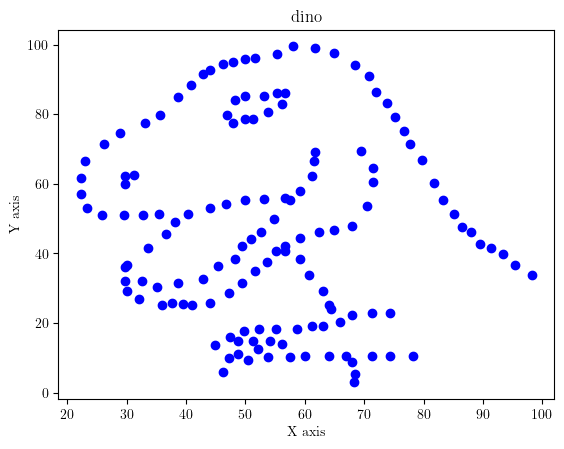

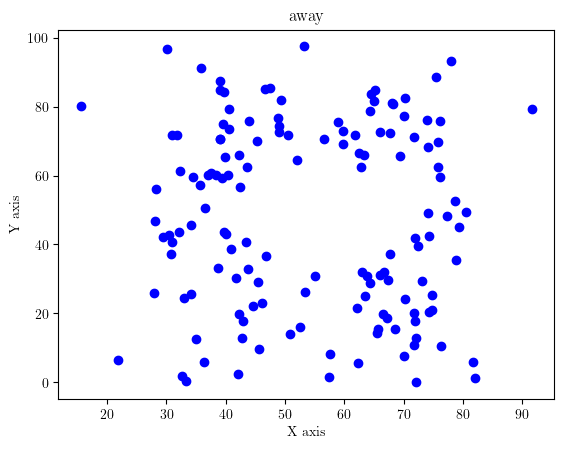

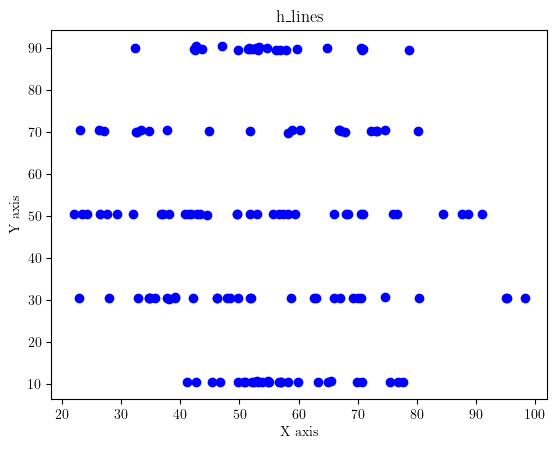

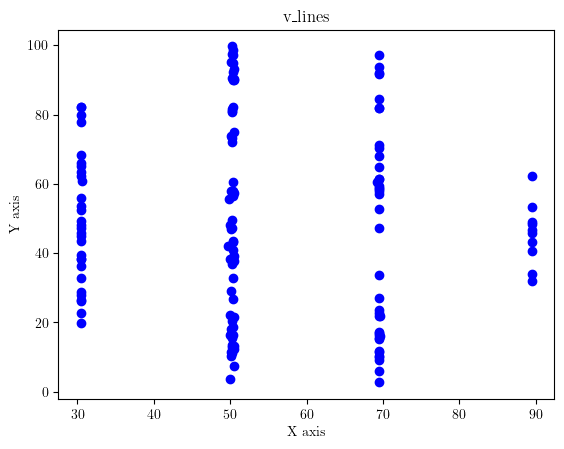

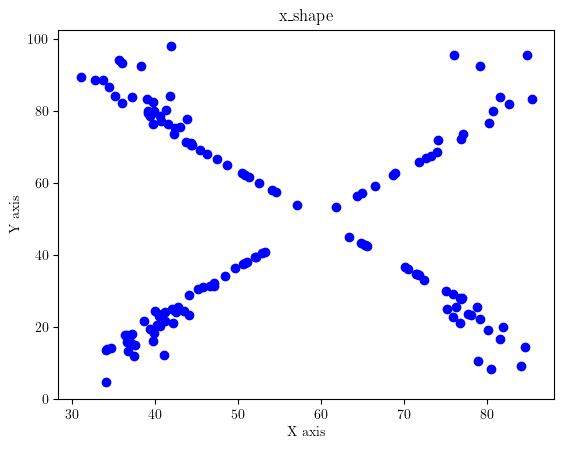

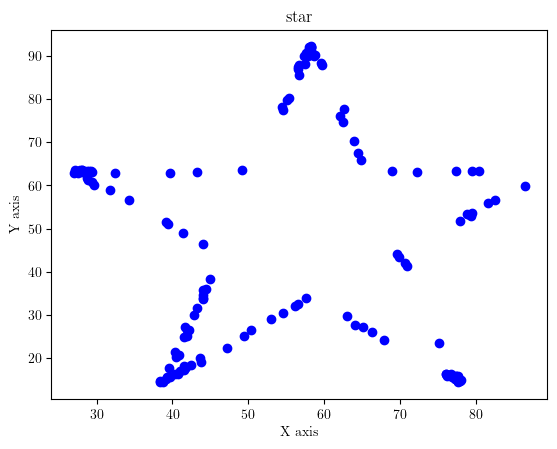

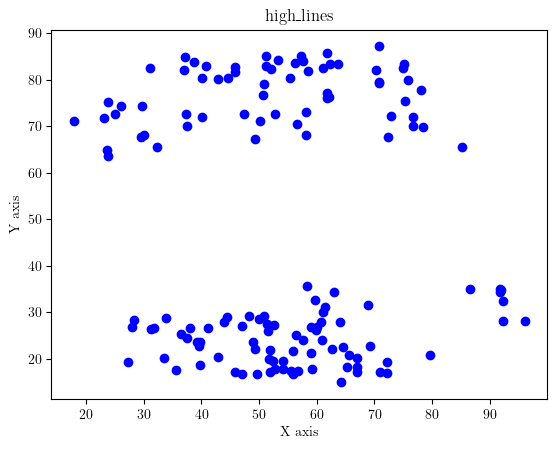

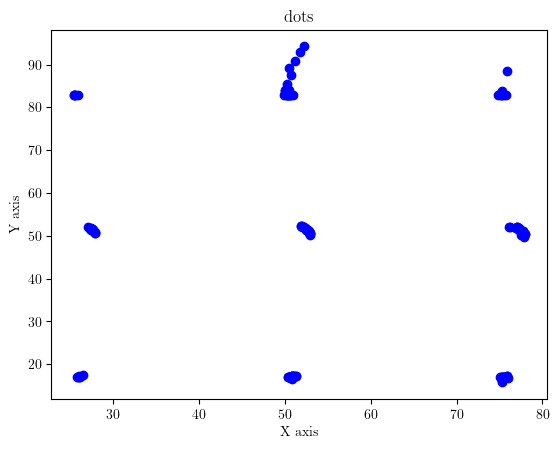

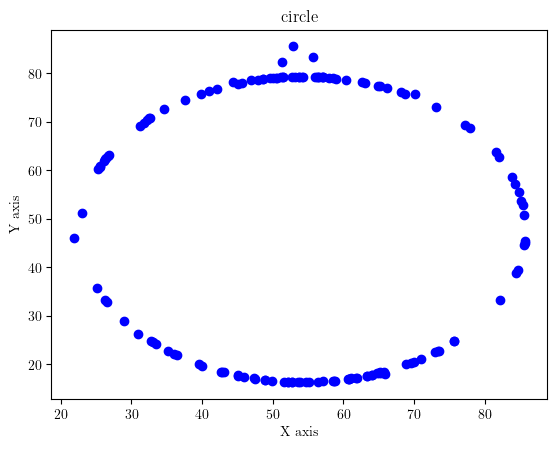

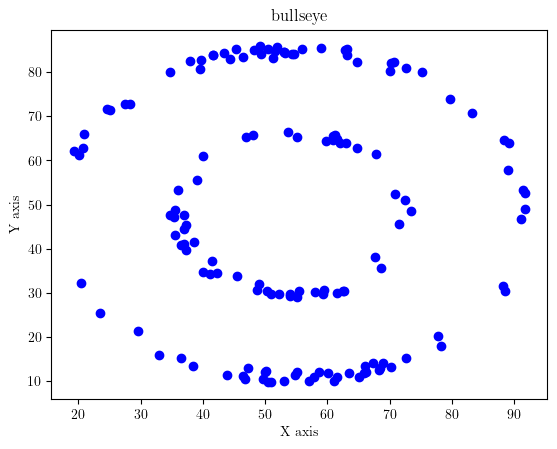

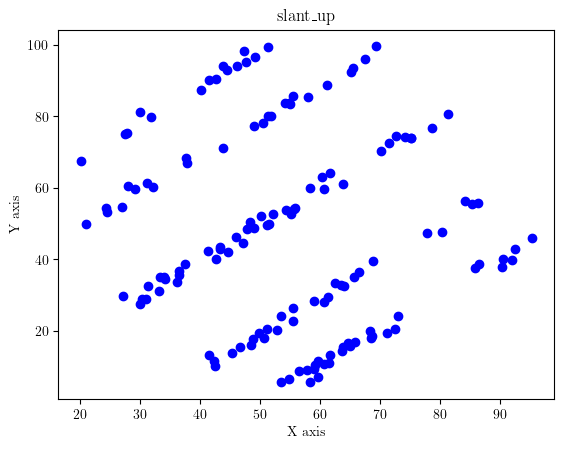

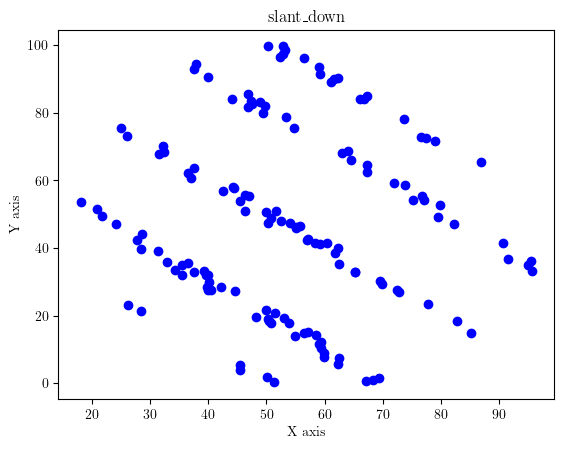

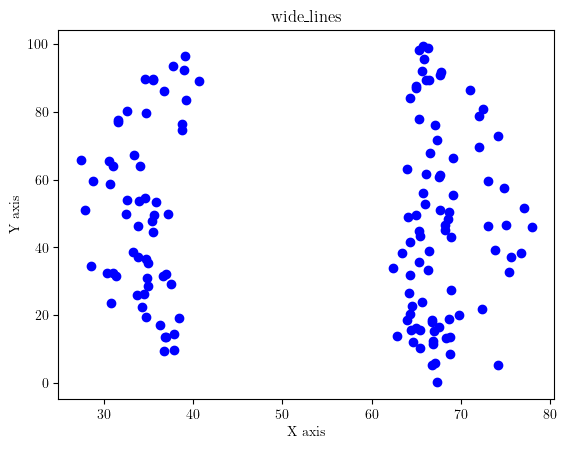

In [50]:
for name, values in datasaurus.items():
    x_coords = [p[0] for p in values]
    y_coords = [p[1] for p in values]

    # Plot points
    plt.scatter(x_coords, y_coords, color='blue')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title(name)
    plt.show()

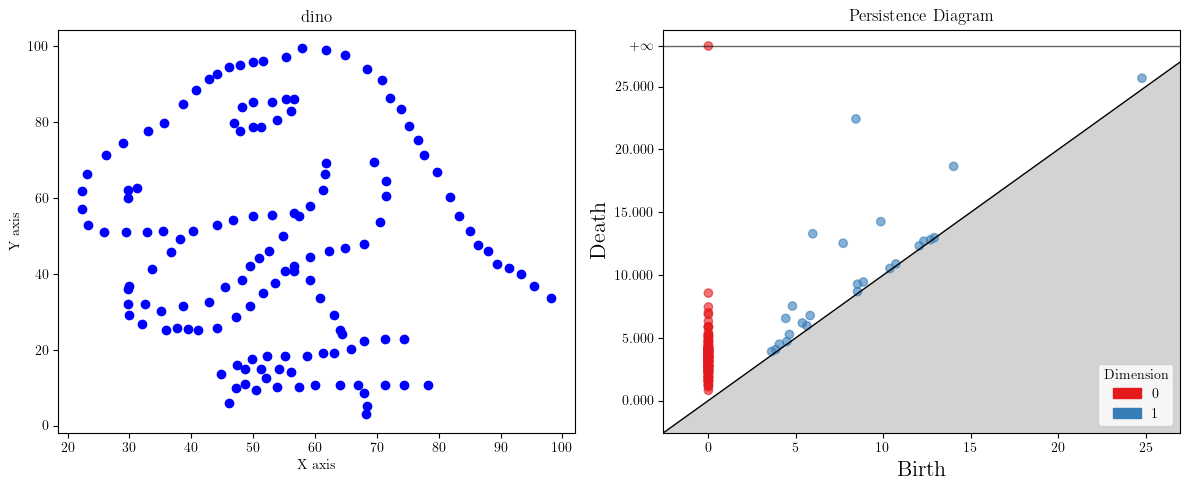

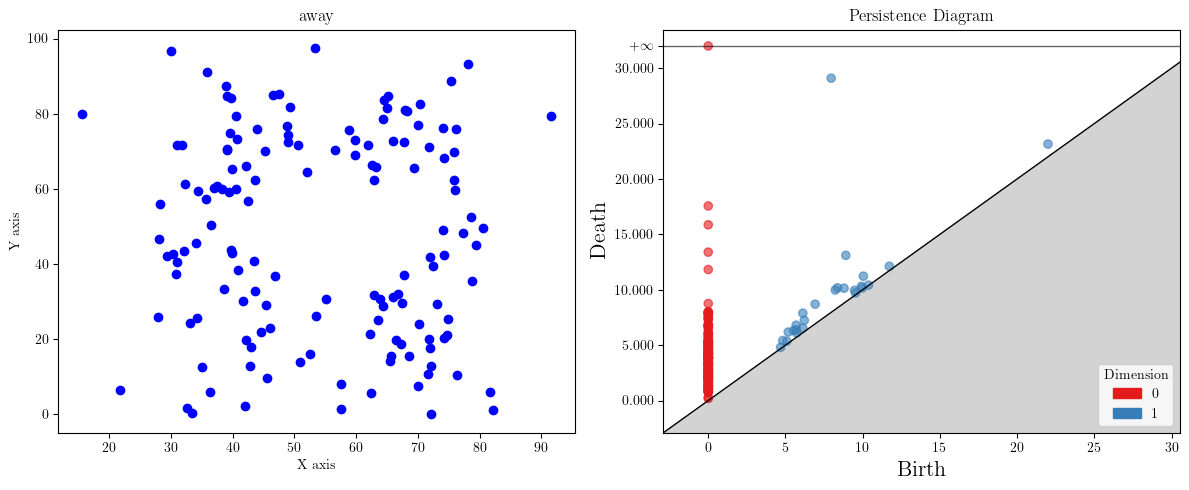

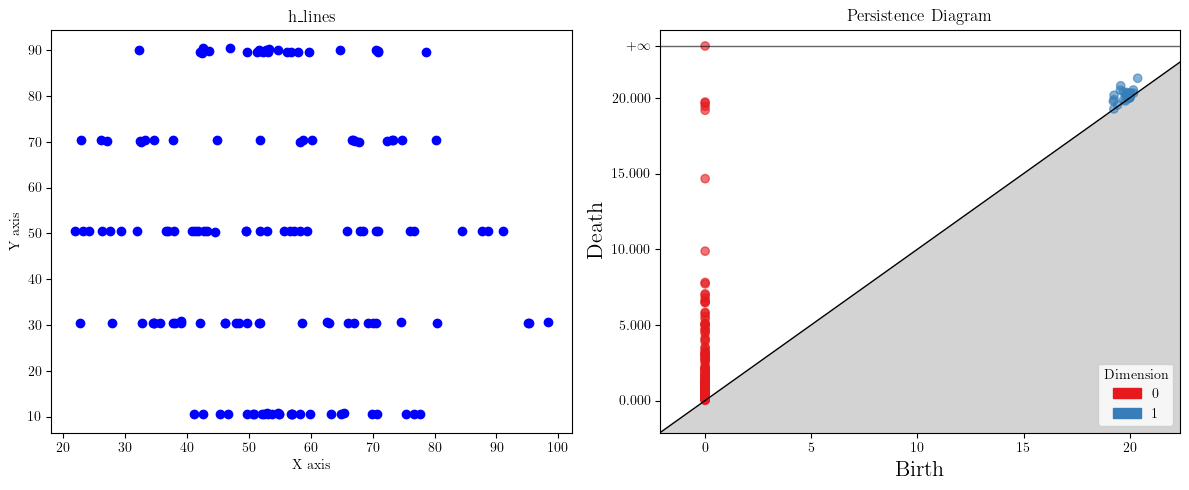

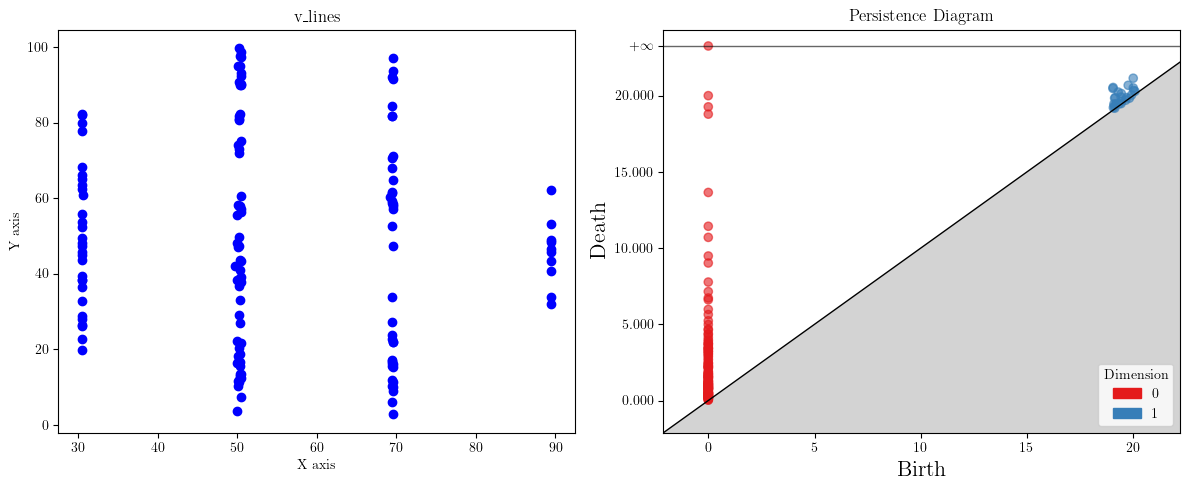

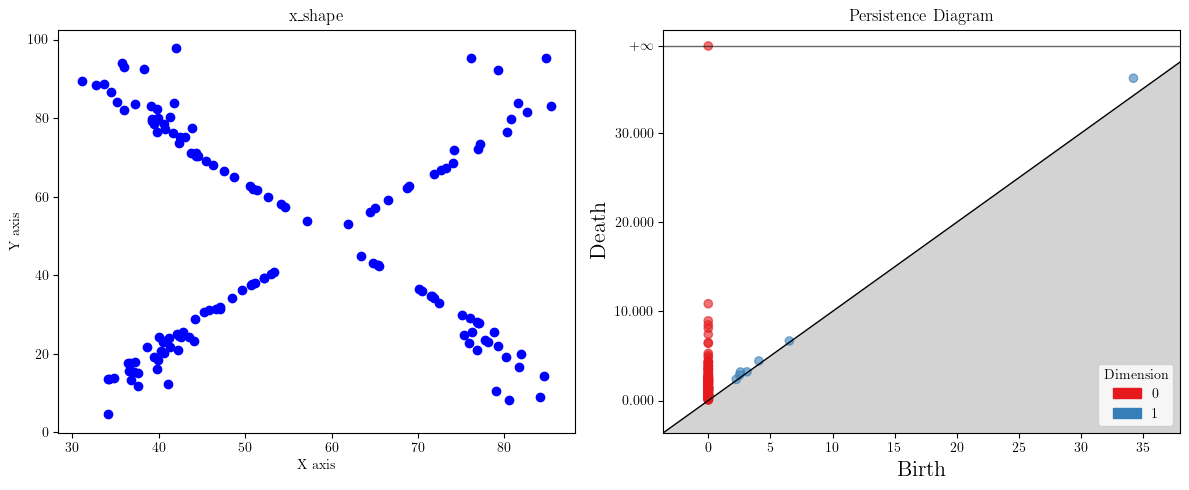

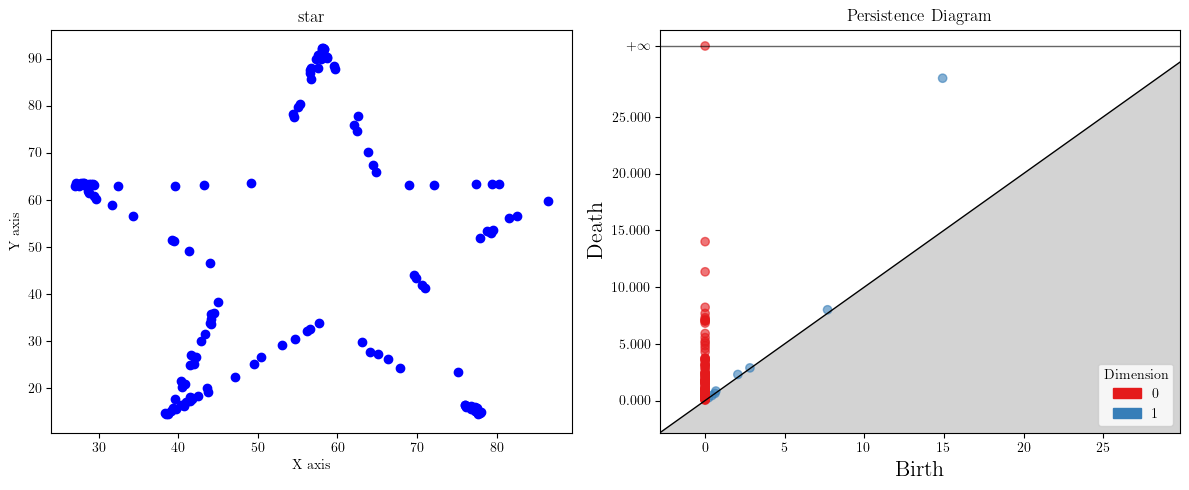

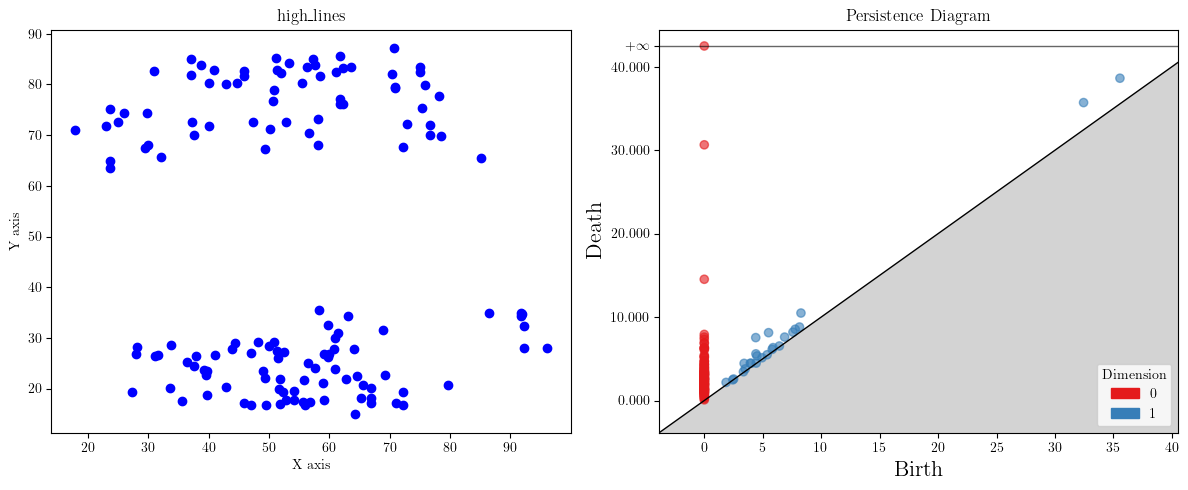

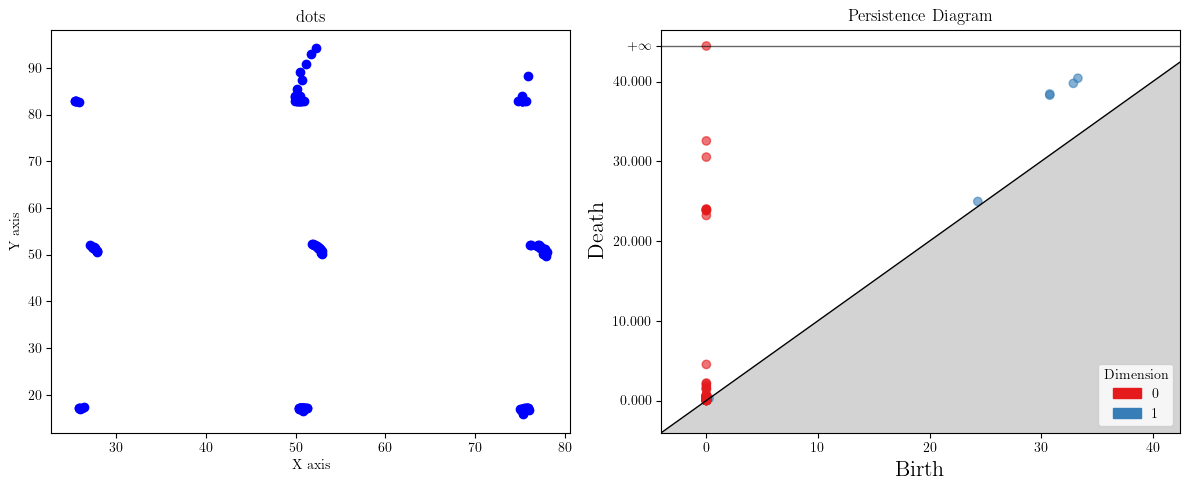

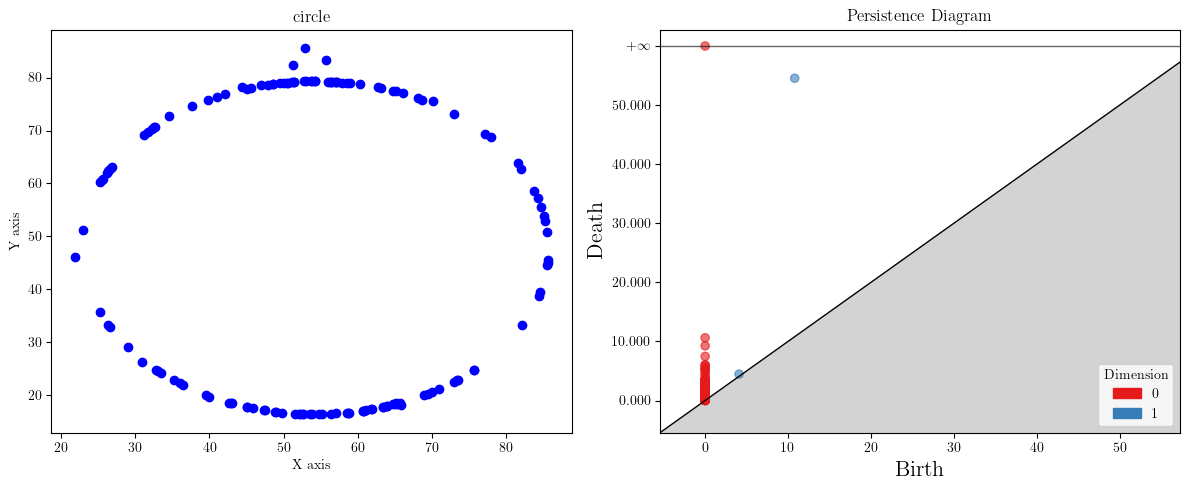

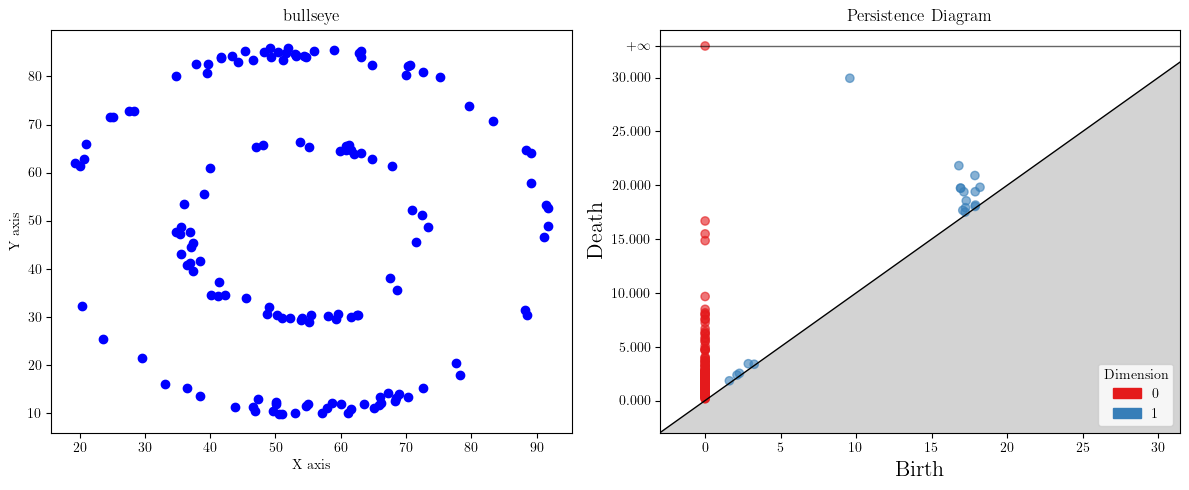

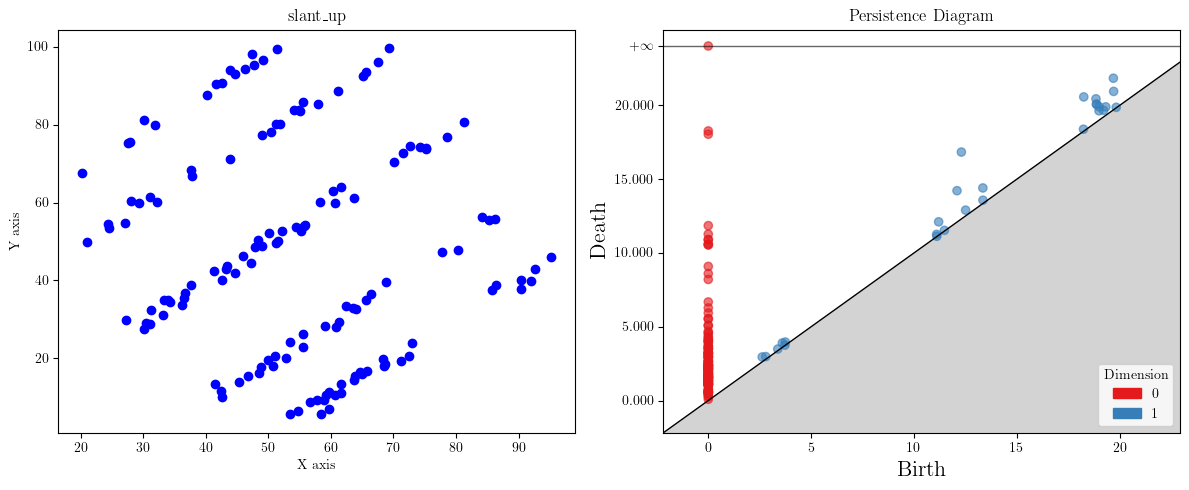

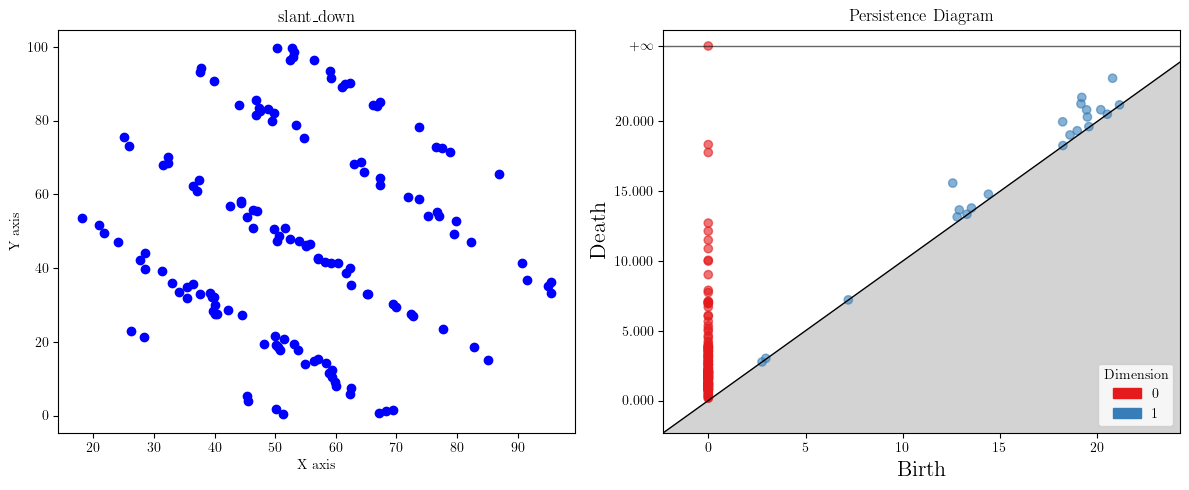

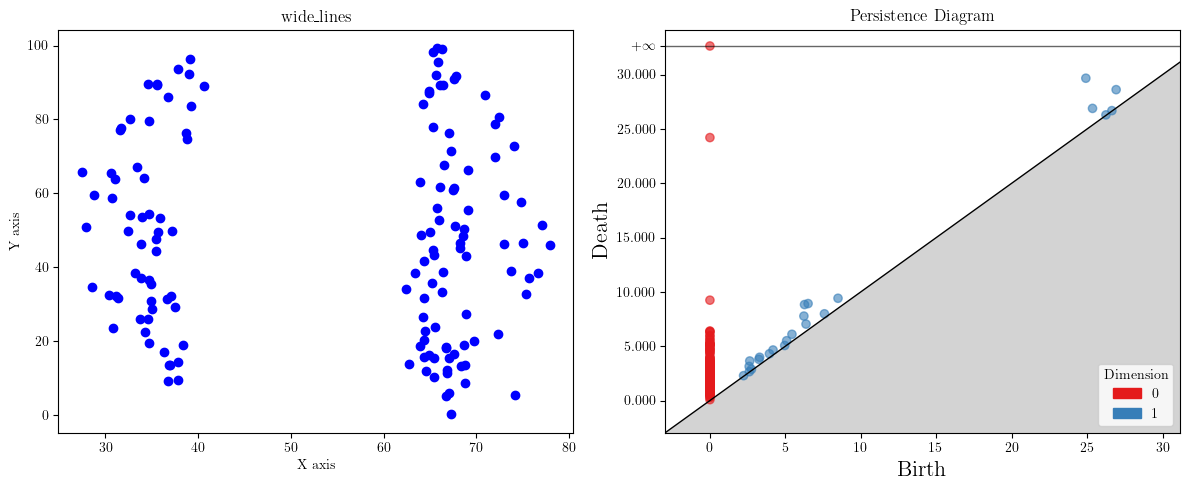

In [48]:
for name, values in datasaurus.items():
    x_coords = [p[0] for p in values]
    y_coords = [p[1] for p in values]

    # Plot on the given axis
    ax.scatter(x_coords, y_coords, color='blue')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(name)
    
    # Create Rips complex and persistence homology
    rips_complex = gudhi.RipsComplex(points=values)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    pers_homology = simplex_tree.persistence()

    # Create figure with two side-by-side subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the dataset on the first subplot
    plot_dataset(axes[0], name, values)

    # Plot the persistence diagram on the second subplot
    gudhi.plot_persistence_diagram(pers_homology, axes=axes[1])
    axes[1].set_title("Persistence Diagram")

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


In [30]:

rows = []
for name, values in datasaurus.items():
    mean, covariance = mean_cov(values)
    rows.append({
        "Dataset": name,
        "Mean (x, y)": mean,
        "Covariance Matrix": covariance
    })

df = pd.DataFrame(rows)

# Optional: format for better display
def format_cov_matrix(cov):
    return f"[[{cov[0,0]:.2f}, {cov[0,1]:.2f}], [{cov[1,0]:.2f}, {cov[1,1]:.2f}]]"

df["Mean (x, y)"] = df["Mean (x, y)"].apply(lambda m: f"({m[0]:.2f}, {m[1]:.2f})")
df["Covariance Matrix"] = df["Covariance Matrix"].apply(format_cov_matrix)

df


,Dataset,"Mean (x, y)",Covariance Matrix
0,dino,"(54.26, 47.83)","[[281.07, -29.11], [-29.11, 725.52]]"
1,away,"(54.27, 47.83)","[[281.23, -28.97], [-28.97, 725.75]]"
2,h_lines,"(54.26, 47.83)","[[281.10, -27.87], [-27.87, 725.76]]"
3,v_lines,"(54.27, 47.84)","[[281.23, -31.37], [-31.37, 725.64]]"
4,x_shape,"(54.26, 47.84)","[[281.23, -29.62], [-29.62, 725.22]]"
5,star,"(54.27, 47.84)","[[281.20, -28.43], [-28.43, 725.24]]"
6,high_lines,"(54.27, 47.84)","[[281.12, -30.94], [-30.94, 725.76]]"
7,dots,"(54.26, 47.84)","[[281.16, -27.25], [-27.25, 725.24]]"
8,circle,"(54.27, 47.84)","[[280.90, -30.85], [-30.85, 725.23]]"
9,bullseye,"(54.27, 47.83)","[[281.21, -30.98], [-30.98, 725.53]]"


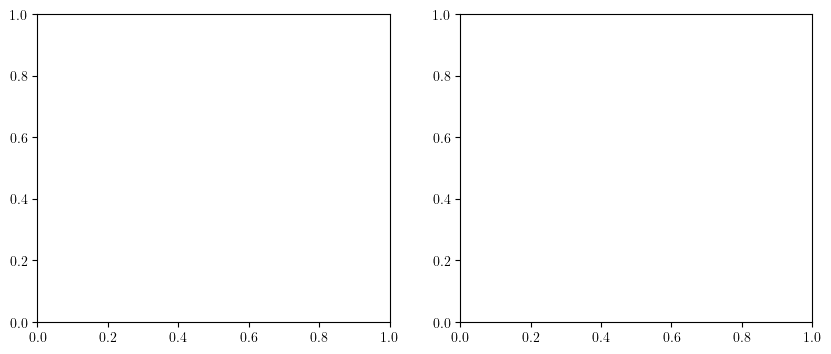

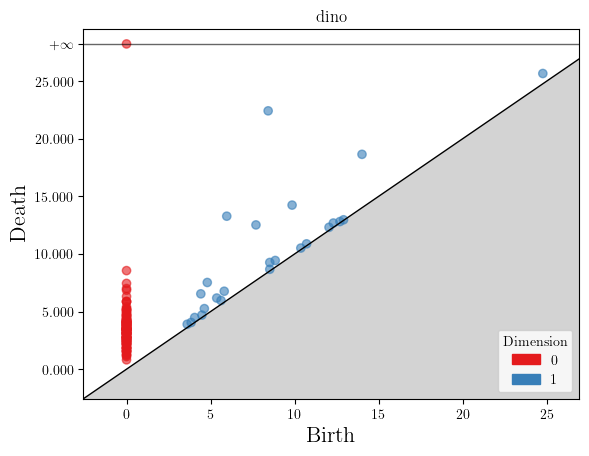

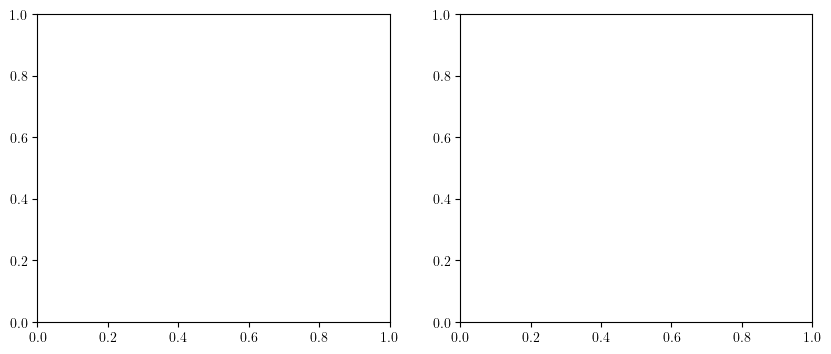

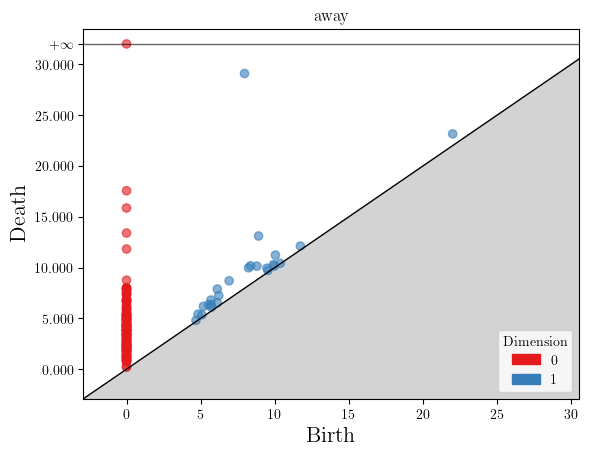

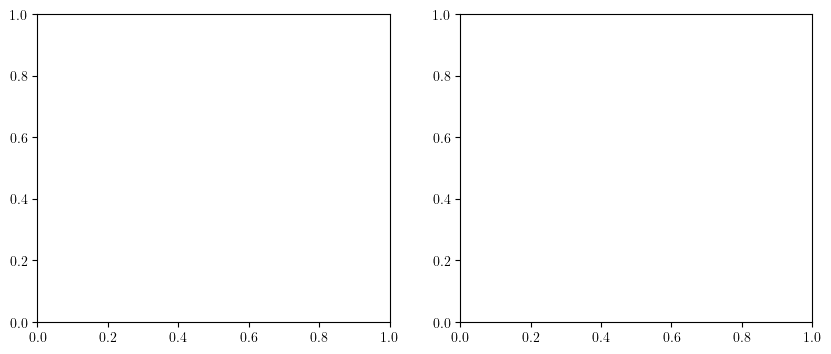

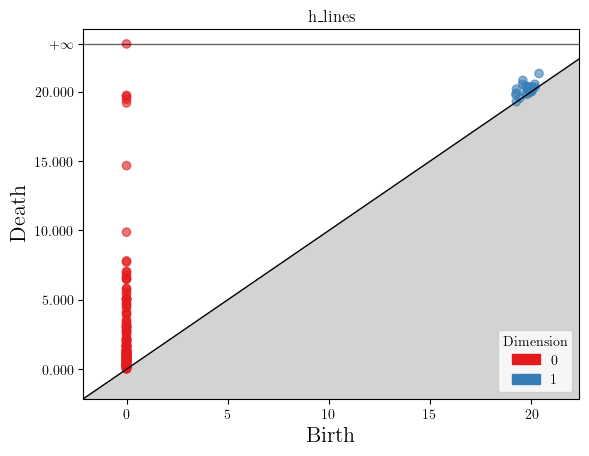

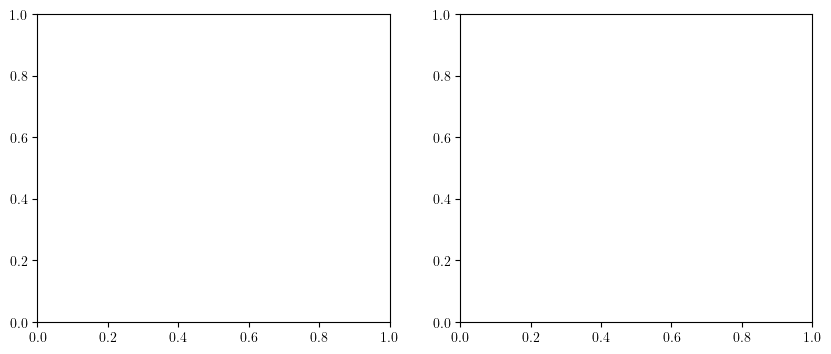

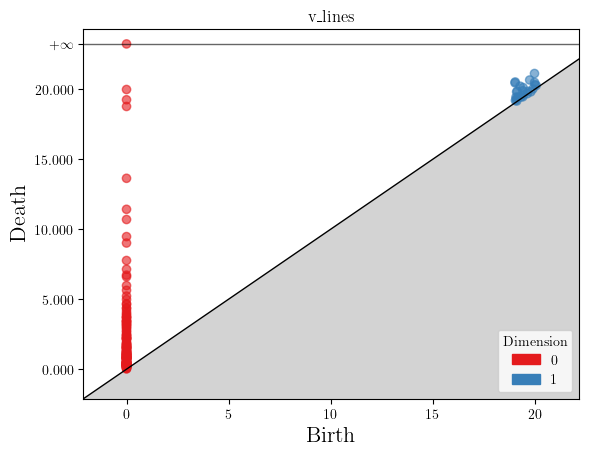

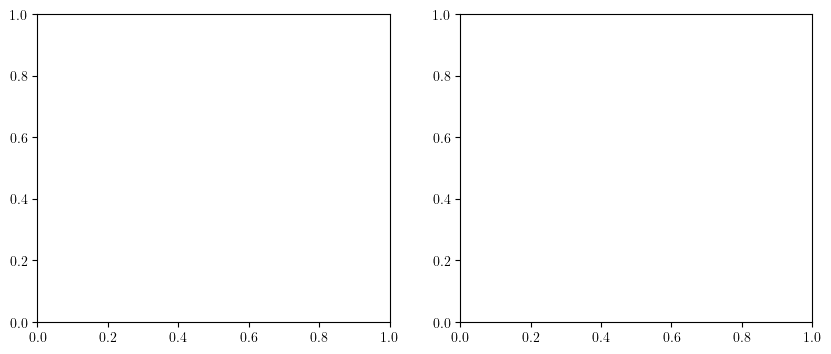

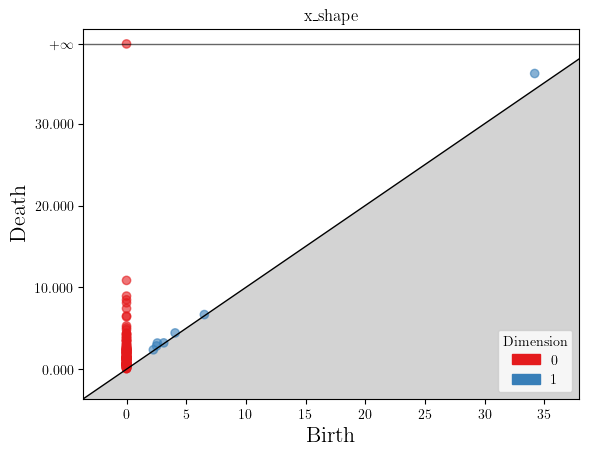

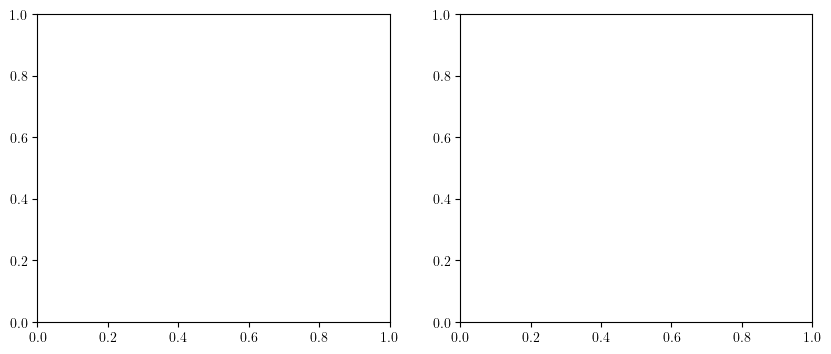

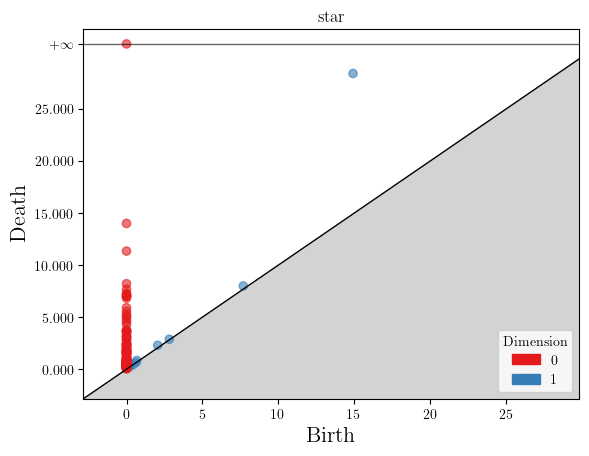

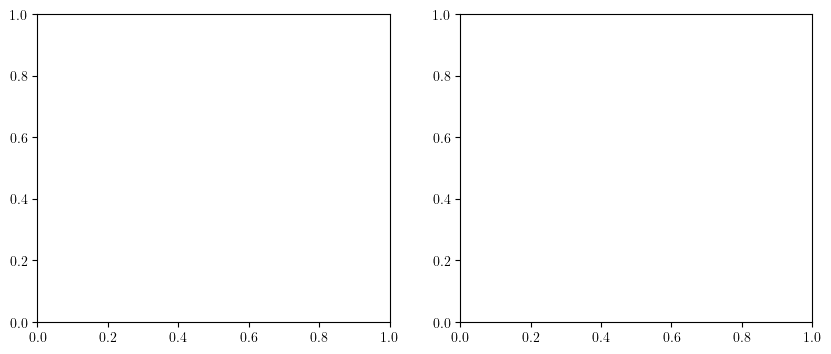

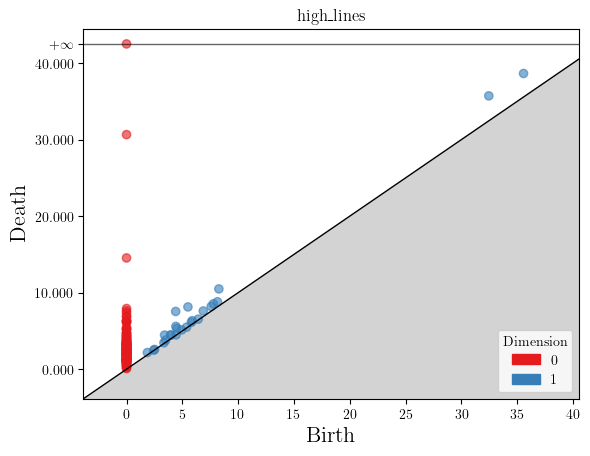

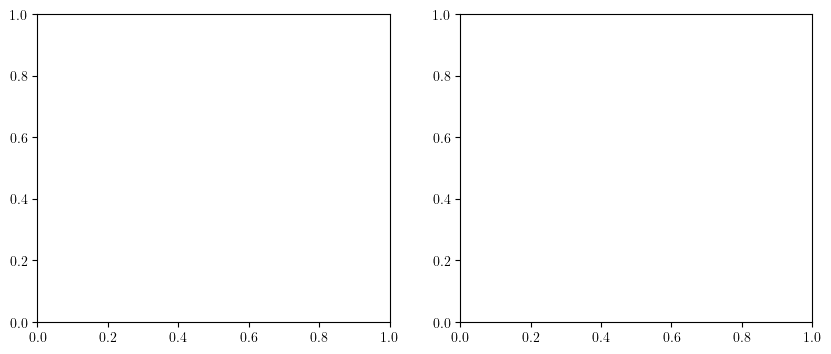

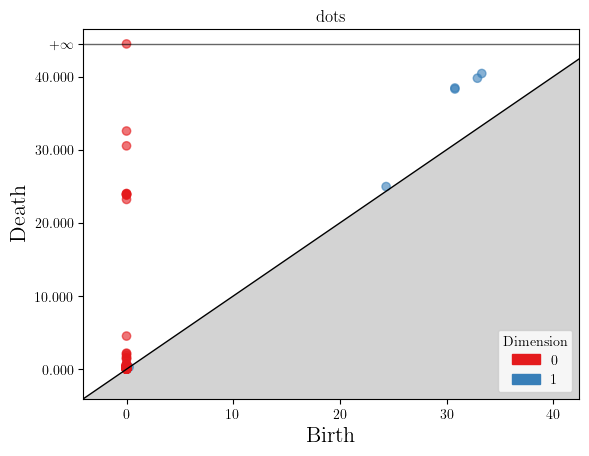

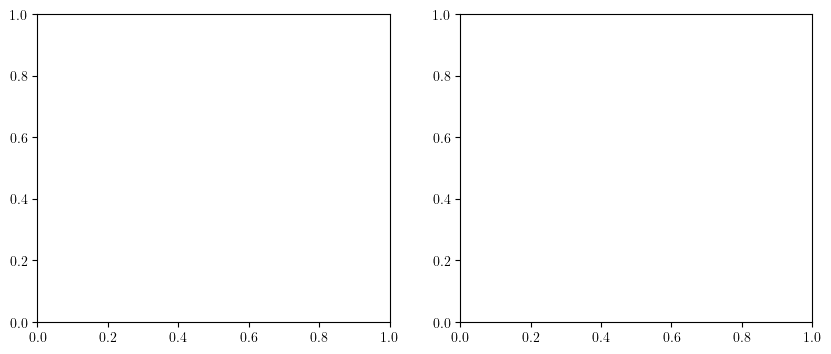

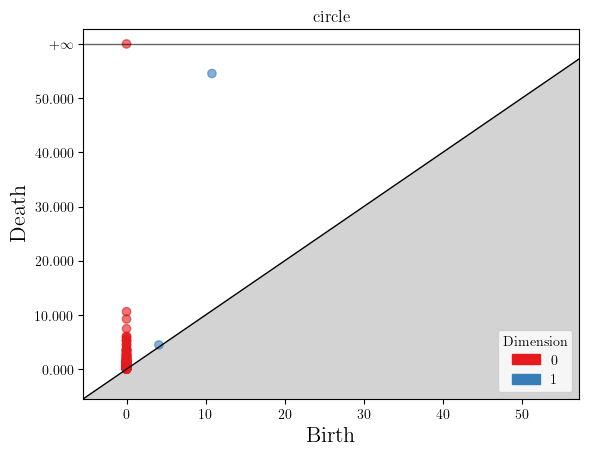

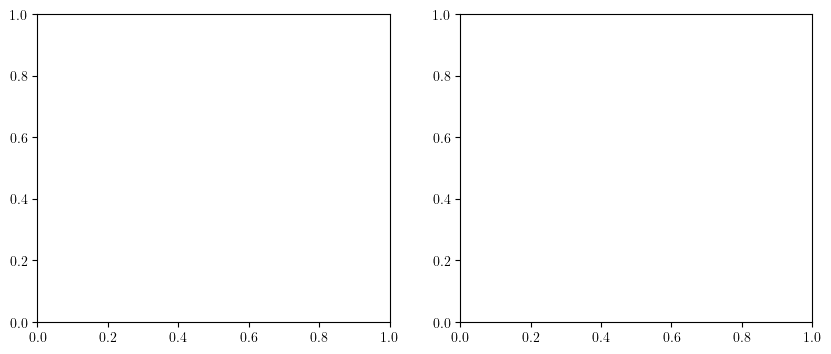

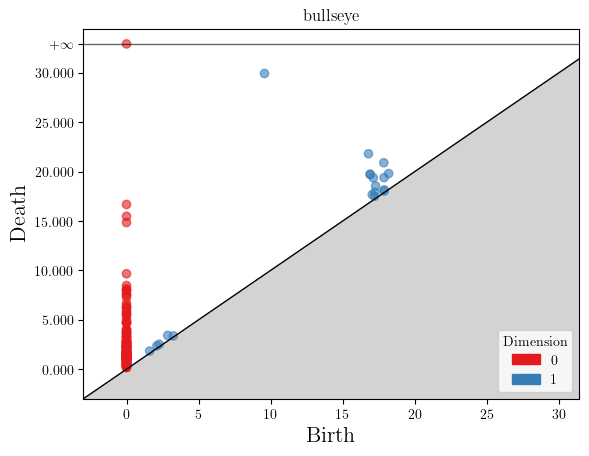

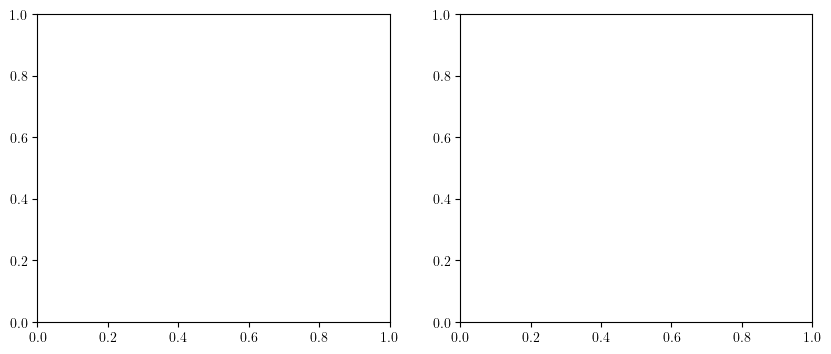

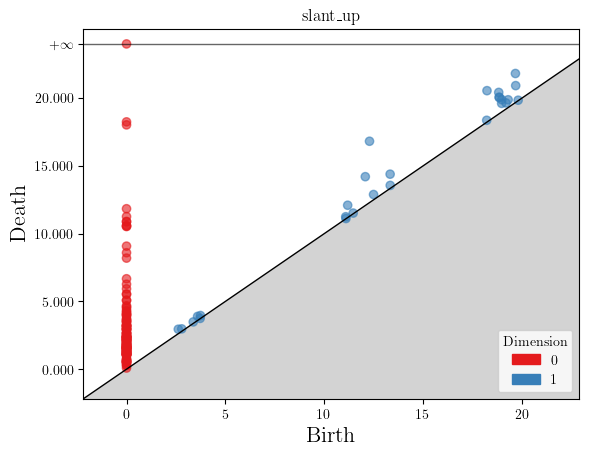

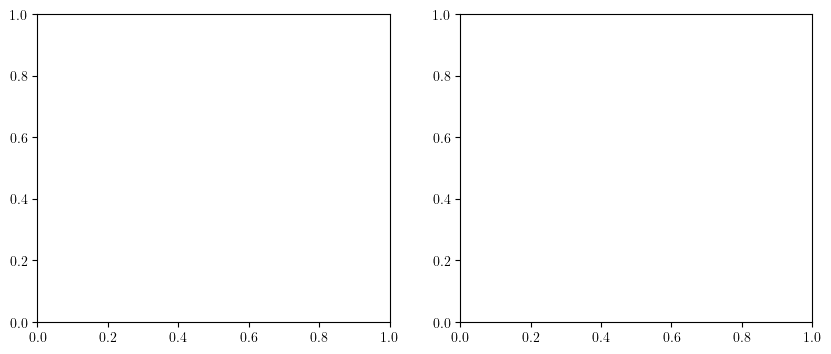

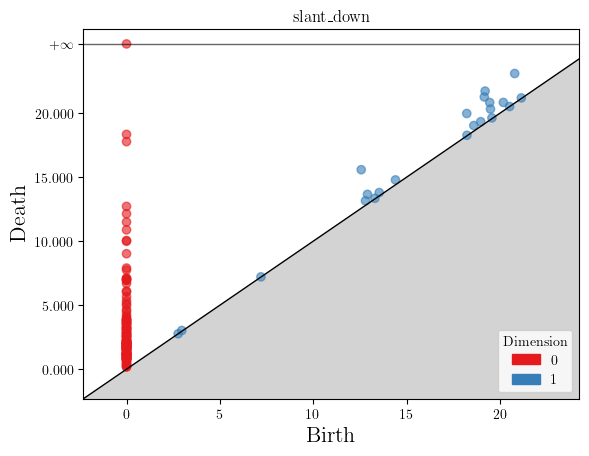

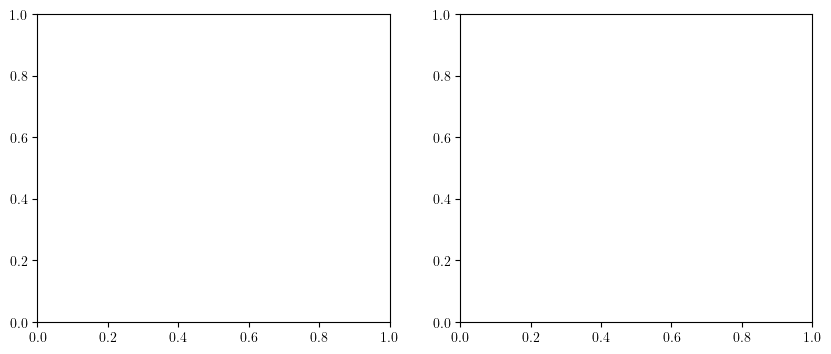

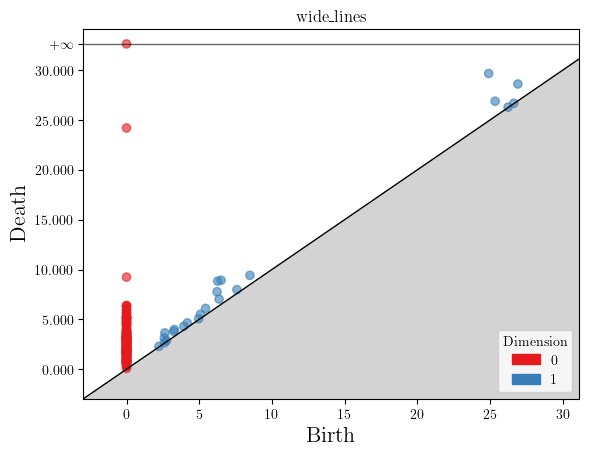

In [39]:
for name, values in datasaurus.items():
    rips_complex = gudhi.RipsComplex(points=values)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    pers_homology = simplex_tree.persistence()
    gudhi.plot_persistence_diagram(pers_homology)
    plt.show()

In [38]:
# Wrócimy tutaj jeszcze pod koniec